In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import chi2_contingency
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

df=pd.read_csv("AfterOutliers.csv")

In [2]:
df["Brand"].value_counts()

6.0     3441
4.0     2083
8.0     1639
7.0     1456
3.0      666
13.0     657
12.0     436
2.0      326
18.0     295
1.0      241
9.0      239
5.0      187
33.0     141
21.0     128
22.0     125
24.0     118
14.0     103
11.0      95
10.0      54
17.0      52
20.0      51
35.0      46
19.0      41
30.0      39
32.0      33
38.0      32
25.0      27
26.0      23
15.0      13
39.0       5
23.0       4
31.0       1
Name: Brand, dtype: int64

In [3]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,number,Brand,Type of Vehicle,Production Year,EngineSize,Country,LastTestDT,TokefDT,Importer,RoadDT,Engine Type
count,12797.000000,12797.000000,1.279700e+04,12797.000000,12797.0,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000
mean,7693.672345,7693.672345,2.556485e+07,8.034149,1.0,2010.067281,2.683598,2.085176,2020.847386,2021.861843,1.098461,2010.067281,1.536845
std,4514.158012,4514.158012,3.265802e+07,5.941099,0.0,10.060838,1.223401,1.268414,0.420719,0.382255,0.297948,10.060838,0.956129
min,0.000000,0.000000,8.194500e+05,1.000000,1.0,1929.000000,1.000000,1.000000,2017.000000,2020.000000,1.000000,1929.000000,1.000000
25%,3885.000000,3885.000000,9.256571e+06,4.000000,1.0,2009.000000,2.000000,1.000000,2021.000000,2022.000000,1.000000,2009.000000,1.000000
50%,7545.000000,7545.000000,9.593379e+06,6.000000,1.0,2011.000000,3.000000,1.000000,2021.000000,2022.000000,1.000000,2011.000000,1.000000
75%,11574.000000,11574.000000,9.925274e+06,8.000000,1.0,2016.000000,3.000000,3.000000,2021.000000,2022.000000,1.000000,2016.000000,2.000000
max,15630.000000,15630.000000,9.263630e+07,39.000000,1.0,2021.000000,6.000000,6.000000,2021.000000,2023.000000,2.000000,2021.000000,5.000000


In [4]:
df2=df.copy()

In [5]:
Y=df2["Production Year"]
X=df2[["Brand","Engine Type","number","EngineSize","Country","Importer","LastTestDT","TokefDT"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
trained_model=LinearRegression()
trained_model.fit(X_train,y_train)
predicted_vals=trained_model.predict(X_test)
r2_score(y_test,predicted_vals)

0.25718958142096693

In [6]:
df2

,Unnamed: 0,Unnamed: 0.1,number,Brand,Type of Vehicle,degemRehev,Production Year,EngineSize,Country,LastTestDT,TokefDT,Importer,RoadDT,Engine Type
0,0,0,9933579,1.0,1.0,CK1506,2017,6.0,1.0,2021,2022,1,2017,1
1,1,1,9350173,2.0,1.0,אוברלנ שירוקי R6GG,2011,3.0,1.0,2021,2022,1,2011,1
2,2,2,9191555,3.0,1.0,מרקורי 3F92,1974,5.0,1.0,2021,2022,1,1974,1
3,3,3,9751173,4.0,1.0,סיינהGSL30L-PRTQKA,2012,3.0,1.0,2021,2022,1,2012,1
4,4,4,9990273,5.0,1.0,ZF13,2012,1.0,2.0,2020,2022,1,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792,15626,15626,9888872,8.0,1.0,35D X5,2011,2.0,1.0,2021,2022,1,2011,4
12793,15627,15627,9532372,3.0,1.0,J5A,2011,3.0,1.0,2021,2022,1,2011,1
12794,15628,15628,9217572,4.0,1.0,GGL15L-CWTGKA,2011,3.0,1.0,2021,2022,2,2011,1
12795,15629,15629,9429478,9.0,1.0,ROVER EVOAUE A2BE,2015,2.0,5.0,2021,2022,1,2015,4


In [7]:
Y=df2["Production Year"]
X=df2[["Brand","Engine Type"]]
Y=df2["Production Year"]
X=df2[["Brand","Engine Type","number","EngineSize","Country","Importer","LastTestDT","TokefDT"]]

In [8]:
Y=df2["Production Year"]
X=df2[["Brand","Engine Type","number","EngineSize","Country","Importer","LastTestDT","TokefDT"]]
scaler = MinMaxScaler()
dfTest=df2.copy()
dfTest[["Brand","Engine Type","number","EngineSize","Country","Importer","LastTestDT","TokefDT"]] = scaler.fit_transform(df2[["Brand","Engine Type","number","EngineSize","Country","Importer","LastTestDT","TokefDT"]])
dfTest

,Unnamed: 0,Unnamed: 0.1,number,Brand,Type of Vehicle,degemRehev,Production Year,EngineSize,Country,LastTestDT,TokefDT,Importer,RoadDT,Engine Type
0,0,0,0.099264,0.000000,1.0,CK1506,2017,1.0,0.0,1.00,0.666667,0.0,2017,0.00
1,1,1,0.092910,0.026316,1.0,אוברלנ שירוקי R6GG,2011,0.4,0.0,1.00,0.666667,0.0,2011,0.00
2,2,2,0.091183,0.052632,1.0,מרקורי 3F92,1974,0.8,0.0,1.00,0.666667,0.0,1974,0.00
3,3,3,0.097278,0.078947,1.0,סיינהGSL30L-PRTQKA,2012,0.4,0.0,1.00,0.666667,0.0,2012,0.00
4,4,4,0.099882,0.105263,1.0,ZF13,2012,0.0,0.2,0.75,0.666667,0.0,2012,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792,15626,15626,0.098777,0.184211,1.0,35D X5,2011,0.2,0.0,1.00,0.666667,0.0,2011,0.75
12793,15627,15627,0.094895,0.052632,1.0,J5A,2011,0.4,0.0,1.00,0.666667,0.0,2011,0.00
12794,15628,15628,0.091466,0.078947,1.0,GGL15L-CWTGKA,2011,0.4,0.0,1.00,0.666667,1.0,2011,0.00
12795,15629,15629,0.093774,0.210526,1.0,ROVER EVOAUE A2BE,2015,0.2,0.8,1.00,0.666667,0.0,2015,0.75


In [9]:
Y=dfTest["Production Year"]
X=dfTest[["Brand","Engine Type","EngineSize","Country","Importer"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
trained_model=LinearRegression()
trained_model.fit(X_train,y_train)
predicted_vals=trained_model.predict(X_test)
r2_score(y_test,predicted_vals)

0.18447056991934707

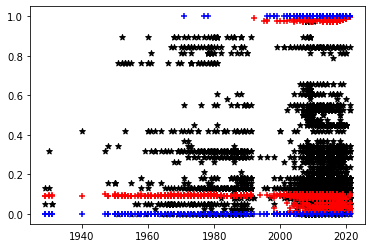

In [10]:
plt.scatter(x=dfTest['Production Year'],y=dfTest['Brand'],c='k',marker='*',label='Newspaper')
plt.scatter(x=dfTest['Production Year'],y=dfTest['number'],c='r',marker='+',label='Newspaper')
plt.scatter(x=dfTest['Production Year'],y=dfTest['Importer'],c='b',marker='+',label='Newspaper')

In [11]:
len(df2[df2["Production Year"]>2000])

11750

In [12]:
dfnew=dfTest.copy()

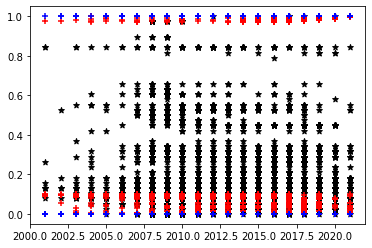

In [13]:
dfnew=dfnew[dfnew["Production Year"]>2000]
plt.scatter(x=dfnew['Production Year'],y=dfnew['Brand'],c='k',marker='*',label='Newspaper')
plt.scatter(x=dfnew['Production Year'],y=dfnew['number'],c='r',marker='+',label='Newspaper')
plt.scatter(x=dfnew['Production Year'],y=dfnew['Importer'],c='b',marker='+',label='Newspaper')

In [14]:
Y=dfnew["Production Year"]
X=dfnew[["Brand","Engine Type","number","EngineSize","Country","Importer","LastTestDT","TokefDT"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
trained_model=LinearRegression()
trained_model.fit(X_train,y_train)
predicted_vals=trained_model.predict(X_test)

In [15]:
print("b1:",trained_model.coef_)
print("b0:",trained_model.intercept_)
r2_score(y_test,predicted_vals)

b1: [-1.65163675  0.51755982  6.43996723 -2.10551193  1.9841525   0.76072134
 -2.46472156  2.85865459]
b0: 2011.8596911669736


0.5347618538373429

In [16]:
trained_model = SVR(kernel="linear", gamma="auto")
trained_model.fit(X_train,y_train)
pred=trained_model.predict(X_train)
print("b1:",trained_model.coef_)
print("b0:",trained_model.intercept_)
r2_score(y_train,pred)

b1: [[-1.80154845  0.63695537  6.92018204 -1.88076917  2.19260305  0.59939247
  -2.43284276  3.17432986]]
b0: [2010.92311696]


0.5288813903740859

In [17]:
dfnew["Engine Type"].value_counts()

0.00    7927
0.25    1991
0.75    1205
0.50     625
1.00       2
Name: Engine Type, dtype: int64

In [18]:
len(dfnew[dfnew["Engine Type"]==0.50])

625

In [19]:
dfEngineChange=dfnew.copy()
dfEngineChange=dfEngineChange[(dfEngineChange["Engine Type"]!=0.5) & (dfEngineChange["Engine Type"]!=1.0)]

In [20]:
dfEngineChange["Engine Type"].value_counts()

0.00    7927
0.25    1991
0.75    1205
Name: Engine Type, dtype: int64

In [21]:
Y=dfEngineChange["Production Year"]
X=dfEngineChange[["Brand","Engine Type","number","EngineSize","Country","Importer","LastTestDT","TokefDT"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
trained_model=LinearRegression()
trained_model.fit(X_train,y_train)
predicted_vals=trained_model.predict(X_test)
r2_score(y_test,predicted_vals)

0.5381334450144761

<AxesSubplot:title={'center':'Production Year'}, ylabel='Production Year'>

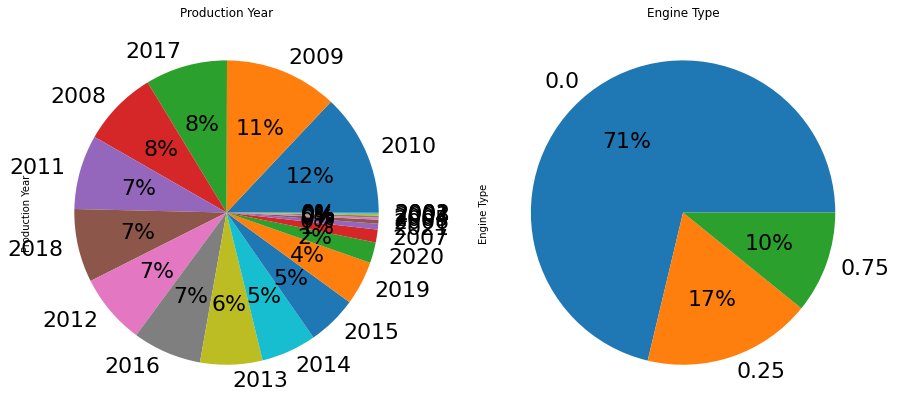

In [22]:
fig, axes = plt.subplots(1,2, figsize=(20,20))
result=dfEngineChange["Engine Type"].value_counts()
sr=pd.Series(result)
sr.plot(kind="pie",figsize=(20,5),ax=axes[1],title="Engine Type",fontsize=22,autopct='%1.1i%%')
result=dfEngineChange["Production Year"].value_counts()
sr=pd.Series(result)
sr.plot(kind="pie",figsize=(15,15),ax=axes[0],title="Production Year",fontsize=22,autopct='%1.1i%%')

In [23]:
arr=['קאדילאק', "ג'יפ" ,'פורד' ,'טויוטה', 'הונדה', 'מרצדס' ,'קרייזלר' ,'ב מ וו',
 'לנדרובר' ,'לקסוס' ,'וולבו', 'פורשה' ,'שברולט', "דודג'" ,'אופל' ,'אלפא', 'יגואר',
 'רובר' ,'יונדאי' ,'מרדצס' ,'אאודי' ,'ניסאן', 'בנטלי' ,'סובארו', 'סוזוקי',
 'מיצובישי', "לנצ'יה" ,'למבורגיני' ,'דונקרוורת' ,'מ. ג', 'פיאט' ,'לינקולן',
 'פולקסווגן', 'פרארי' ,'פונטיאק', 'סקודה', 'ימהה', 'האמר-ארהב"' , 'וויט-וולוו',
 'רנו' ,'מקלארין', 'סמארט' ,'מזדה' ,"ג'י.אמ.סי" ,'טריומף', 'רולס-רויס' ,'קיה',
 "פיג'ו", 'סיטרואן', 'הארלי' ,'טסלה' ,'ביואיק', 'קוואסאקי' ,'קי.טי.אמ' ,'אנפילד']
print("Engine Type : 0=בנזין")
print("Engine Type : 0.25=היברידי")
print("Engine Type : 0.75=דיזל")
print("Importer : 1=משומש")
print("Importer : 0=חדש")

Engine Type : 0=בנזין
Engine Type : 0.25=היברידי
Engine Type : 0.75=דיזל
Importer : 1=משומש
Importer : 0=חדש


In [24]:
Brand=input("Enter Brand:'By the place in array from right to left starting in 1'  ")
Engine_Type=input("Enter Engine Type:")
Engine_Size =input("Enter Engine Size scaled from 1 to 6 :")
Importer=input("Enter Importer:")

Enter Brand:'By the place in array from right to left starting in 1'  1
Enter Engine Type:1
Enter Engine Size scaled from 1 to 6 :1
Enter Importer:1


In [25]:
Production_Year=-1.54*int(Brand) + 1.29*int(Engine_Type) -1.6*int(Engine_Size) + 0.73*int(Importer) + 2012
int(Production_Year)

2010

In [26]:
rslt_df = dfnew.loc[(dfnew['Brand'] == 0.131579) &
              (dfnew['Production Year'] == 2012)]

In [27]:
len(dfnew[dfnew['Brand'] == 0.131579])

0

In [28]:
dfnew["Brand"].value_counts()

0.131579    3228
0.078947    2072
0.184211    1556
0.157895    1434
0.052632     560
0.315789     432
0.289474     373
0.026316     304
0.447368     293
0.210526     237
0.105263     186
0.000000     142
0.526316     128
0.605263     115
0.552632     110
0.842105     110
0.342105      98
0.263158      90
0.236842      54
0.500000      51
0.473684      41
0.973684      32
0.631579      27
0.657895      23
0.421053      15
0.894737      11
0.368421      11
0.815789       8
1.000000       5
0.578947       3
0.789474       1
Name: Brand, dtype: int64

In [29]:
heat=dfnew.copy()
heat

,Unnamed: 0,Unnamed: 0.1,number,Brand,Type of Vehicle,degemRehev,Production Year,EngineSize,Country,LastTestDT,TokefDT,Importer,RoadDT,Engine Type
0,0,0,0.099264,0.000000,1.0,CK1506,2017,1.0,0.0,1.00,0.666667,0.0,2017,0.00
1,1,1,0.092910,0.026316,1.0,אוברלנ שירוקי R6GG,2011,0.4,0.0,1.00,0.666667,0.0,2011,0.00
3,3,3,0.097278,0.078947,1.0,סיינהGSL30L-PRTQKA,2012,0.4,0.0,1.00,0.666667,0.0,2012,0.00
4,4,4,0.099882,0.105263,1.0,ZF13,2012,0.0,0.2,0.75,0.666667,0.0,2012,0.00
5,5,5,0.098163,0.078947,1.0,קאמריASV40L-CETSKA,2012,0.2,0.0,1.00,0.666667,0.0,2012,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792,15626,15626,0.098777,0.184211,1.0,35D X5,2011,0.2,0.0,1.00,0.666667,0.0,2011,0.75
12793,15627,15627,0.094895,0.052632,1.0,J5A,2011,0.4,0.0,1.00,0.666667,0.0,2011,0.00
12794,15628,15628,0.091466,0.078947,1.0,GGL15L-CWTGKA,2011,0.4,0.0,1.00,0.666667,1.0,2011,0.00
12795,15629,15629,0.093774,0.210526,1.0,ROVER EVOAUE A2BE,2015,0.2,0.8,1.00,0.666667,0.0,2015,0.75


In [30]:
heat.drop(["Type of Vehicle"],axis=1,inplace=True)

<AxesSubplot:>

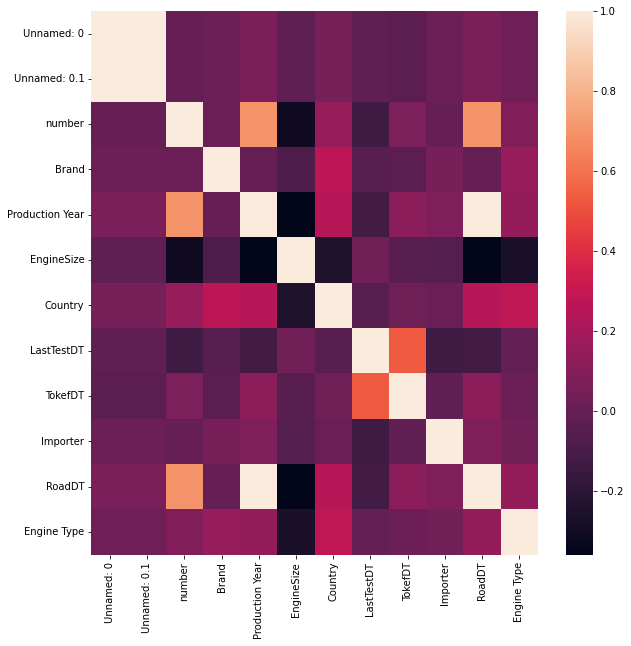

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(heat.corr(),ax=ax)

In [36]:
dfnew["Production Year"].value_counts()

2009    1541
2010    1538
2008    1069
2017     973
2011     918
2018     868
2012     862
2016     822
2013     758
2014     665
2015     596
2019     521
2020     245
2007     169
2021      69
2006      52
2005      25
2004      24
2003      20
2001       9
2002       6
Name: Production Year, dtype: int64

In [47]:
Y=dfnew["Brand"]
X=dfnew[["Production Year","Importer","number","Engine Type","EngineSize","Country","LastTestDT","TokefDT"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
trained_model=LinearRegression()
trained_model.fit(X_train,y_train)
predicted_vals=trained_model.predict(X_test)
r2_score(y_test,predicted_vals)

0.10204760782894129